# stock market prediction

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler


In [6]:
import tensorflow as tf

In [7]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [8]:
data = pd.read_csv("C:/Users/venka/Downloads/testset.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


In [10]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       125 non-null    object 
 1   Open       125 non-null    float64
 2   High       125 non-null    float64
 3   Low        125 non-null    float64
 4   Close      125 non-null    float64
 5   Adj Close  125 non-null    float64
 6   Volume     125 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


In [12]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(125, 1)

In [14]:
X_train = []
y_train = []

for i in range (60,125): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [16]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(65, 60, 1)

In [17]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [18]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
3/3 - 18s - loss: 0.2527 - 18s/epoch - 6s/step
Epoch 2/20
3/3 - 1s - loss: 0.1258 - 826ms/epoch - 275ms/step
Epoch 3/20
3/3 - 1s - loss: 0.0819 - 560ms/epoch - 187ms/step
Epoch 4/20
3/3 - 1s - loss: 0.0646 - 770ms/epoch - 257ms/step
Epoch 5/20
3/3 - 1s - loss: 0.0820 - 582ms/epoch - 194ms/step
Epoch 6/20
3/3 - 1s - loss: 0.0797 - 580ms/epoch - 193ms/step
Epoch 7/20
3/3 - 1s - loss: 0.0596 - 584ms/epoch - 195ms/step
Epoch 8/20
3/3 - 1s - loss: 0.0676 - 563ms/epoch - 188ms/step
Epoch 9/20
3/3 - 1s - loss: 0.0602 - 597ms/epoch - 199ms/step
Epoch 10/20
3/3 - 1s - loss: 0.0578 - 586ms/epoch - 195ms/step
Epoch 11/20
3/3 - 1s - loss: 0.0551 - 551ms/epoch - 184ms/step
Epoch 12/20
3/3 - 1s - loss: 0.0556 - 571ms/epoch - 190ms/step
Epoch 13/20
3/3 - 1s - loss: 0.0755 - 566ms/epoch - 189ms/step
Epoch 14/20
3/3 - 1s - loss: 0.0514 - 580ms/epoch - 193ms/step
Epoch 15/20
3/3 - 1s - loss: 0.0644 - 564ms/epoch - 188ms/step
Epoch 16/20
3/3 - 1s - loss: 0.0577 - 580ms/epoch - 193ms/step
Epoch

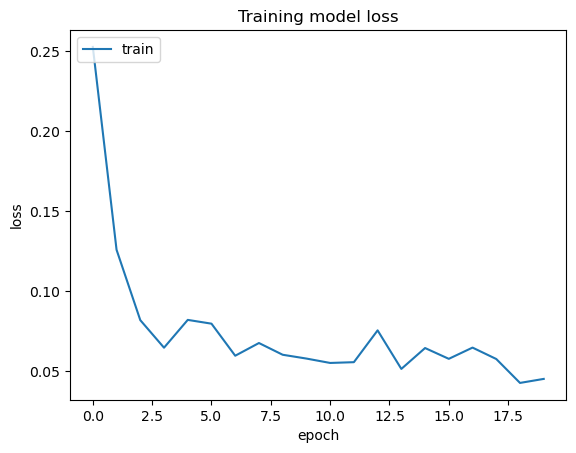

In [19]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
testData = pd.read_csv("C:/Users/venka/Downloads/testset.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(65, 60, 1)

In [22]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 4s 52ms/step


array([[0.69627666],
       [0.63626873],
       [0.5716257 ],
       [0.5056378 ],
       [0.44174552],
       [0.38299334],
       [0.33097076],
       [0.28665018],
       [0.25097114],
       [0.2240556 ],
       [0.20585842],
       [0.19587831],
       [0.1935281 ],
       [0.19920744],
       [0.21314475],
       [0.2355427 ],
       [0.26548862],
       [0.30109856],
       [0.33830142],
       [0.3729273 ],
       [0.40238345],
       [0.42501312],
       [0.43970105],
       [0.44687754],
       [0.44731656],
       [0.44208673],
       [0.43329772],
       [0.4233858 ],
       [0.41441435],
       [0.40885147],
       [0.40911216],
       [0.4167465 ],
       [0.43225396],
       [0.45428836],
       [0.48073536],
       [0.5091342 ],
       [0.5367019 ],
       [0.5616032 ],
       [0.5823542 ],
       [0.59845805],
       [0.60999775],
       [0.6172698 ],
       [0.6201545 ],
       [0.61894643],
       [0.61488855],
       [0.61075246],
       [0.609941  ],
       [0.615

In [23]:
predicted_price = sc.inverse_transform(y_pred)


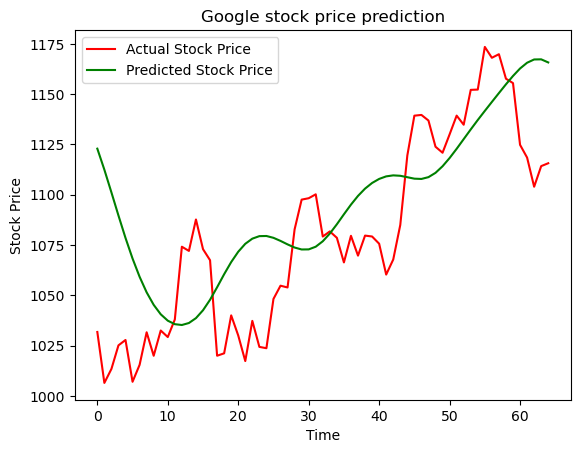

In [24]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()